<a href="https://colab.research.google.com/github/LeonardoD99/Hadamard/blob/main/Hadamard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from google.colab import drive
from PIL import Image


In [3]:
drive.mount('/content/drive')
!cp /content/drive/MyDrive/libreria.py /content
import libreria as p

Mounted at /content/drive


In [4]:
img = plt.imread('/content/drive/My Drive/test.png')


In [5]:
data = np.sum(img, axis = -1)
s = data.shape
print(s)

matrix1 = np.zeros((s[0],256 - s[1]), dtype = int)
matrix0 = np.zeros((256-s[0],256), dtype = int)

data = np.append(data,matrix1,axis = 1)
data = np.append(data,matrix0,axis = 0)
s = data.shape
print(s)


(224, 225)
(256, 256)


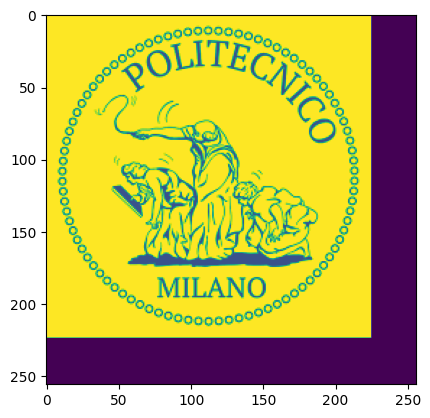

In [7]:
plt.imshow(data)

In [23]:
Dim = np.shape (data)
logDim = int (m.log(Dim[-1],2))
print(logDim)

8


# image generation

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## fractals

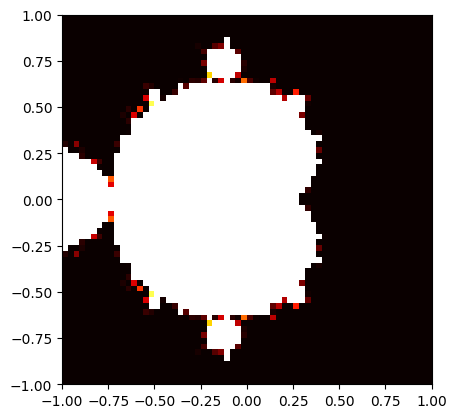

In [8]:
import numpy as np

def mandelbrot(c, max_iter):
    """
    Calculate the number of iterations required to determine if a complex number 'c' belongs to the Mandelbrot set.

    Parameters:
    c (complex): The complex number to be evaluated.
    max_iter (int): The maximum number of iterations allowed to classify 'c' within the Mandelbrot set.

    Returns:
    int: The number of iterations needed to classify 'c' within the Mandelbrot set,
         or 'max_iter' if the limit is not reached.
    """
    z = c
    for n in range(max_iter):
        if abs(z) > 2.0:
            return n
        z = z * z + c
    return max_iter

def create_fractal_image(width, height, max_iter):
    """
    Create a 2D array representing the Mandelbrot set.

    Parameters:
    width (int): The width of the image in pixels.
    height (int): The height of the image in pixels.
    max_iter (int): The maximum number of iterations allowed to classify a complex number within the Mandelbrot set.

    Returns:
    numpy.ndarray: A 2D array of pixel intensities, where darker colors represent points closer to the Mandelbrot set.
    """
    image = np.zeros((height, width))
    for x in range(width):
        for y in range(height):
            c = complex(x / (width - 1) * 2.0 - 1.0, y / (height - 1) * 2.0 - 1.0)
            image[y, x] = mandelbrot(c, max_iter)
    return image

if __name__ == "__main__":
    width = 64
    height = 64
    max_iter = 300

    image1 = create_fractal_image(width, height, max_iter)
    image2 = create_fractal_image(width, height, int(max_iter/10))

    import matplotlib.pyplot as plt

    plt.imshow(image1 - image2, extent=(-1.0, 1.0, -1.0, 1.0), cmap="hot")
    plt.show()


## samila


In [12]:
!pip install samila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 9.3 MB/s eta 0:00:00


In [13]:
import random
import math
import matplotlib.pyplot as plt
from samila import GenerativeImage, Projection


## functions

In [14]:
def f1(x,y):
    result = random.uniform(-1,1) * x**2  - math.sin(y**2) + abs(y-x)
    return result

In [15]:
def f2(x,y):
    result = random.uniform(-1,1) * y**3 - math.sin(x**3) + 2*x
    return result

In [16]:
def bin_array(array, bin_size):
    """
    Bins a 2D numpy array into a smaller 2D array

    Args:
        array (numpy.ndarray): The array to be binned
        bin_size (int): The size of the bins

    Returns:
        numpy.ndarray: The binned array
    """
    x = (1000 - 256*3) / 2
    x = int(x)
    array = array[x:(1000-x),x:(1000-x)]
    bin_rows = int(array.shape[0] / bin_size)
    bin_cols = int(array.shape[1] / bin_size)
    binned_array = np.zeros((bin_rows, bin_cols))

    for i in range(bin_rows):
        for j in range(bin_cols):
            sub_array = array[i * bin_size:(i + 1) * bin_size, j * bin_size:(j + 1) * bin_size]
            binned_array[i, j] = np.mean(sub_array)

    return binned_array




## generate single image

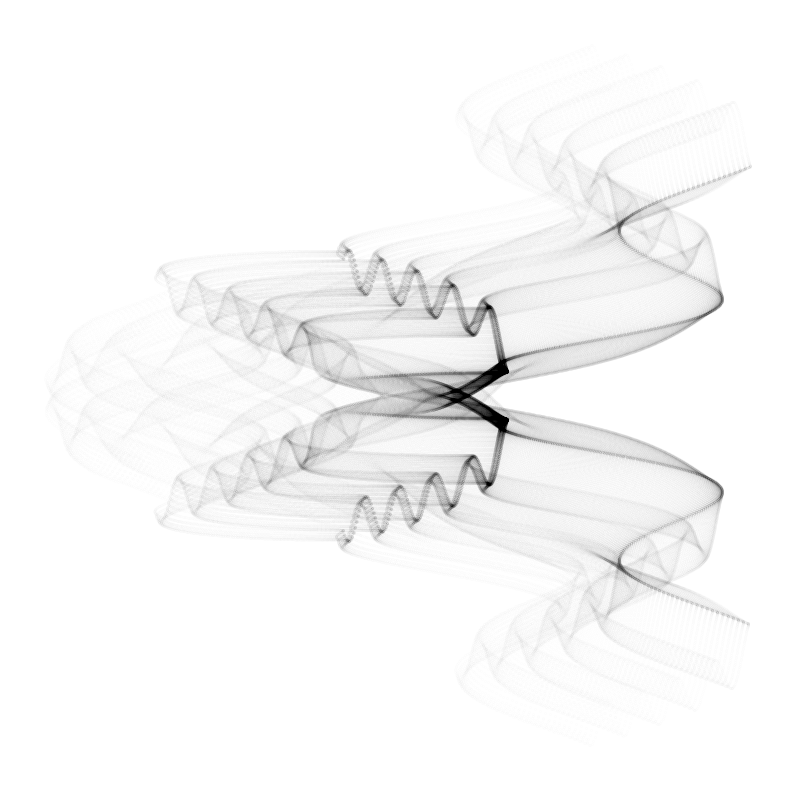

In [17]:
g = GenerativeImage(f2,f1)
g.generate()
g.plot()

In [18]:
titolo = "test.png"
g.save_image(file_adr=titolo)


{'status': True, 'message': '/content/test.png'}

In [19]:
titolo = "test.png"
image = Image.open('/content/'+ titolo)
array = np.array(image)
array = np.sum(array,axis = -1)
matrix = bin_array(array, 3)

(256, 256)


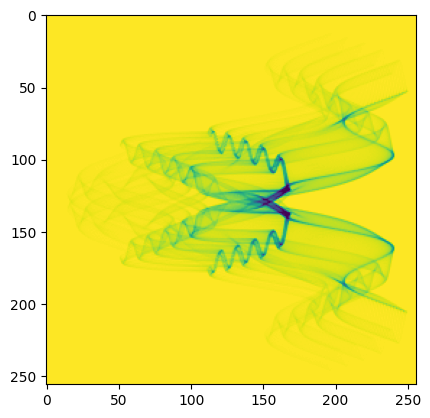

In [20]:
print(matrix.shape)
plt.imshow(matrix)

## generate multiple images

In [ ]:

for i in range(0,10):
  g = GenerativeImage(f1,f1)
  g.generate()
  g.plot()
  titolo = "test" + str(i)+".png"
  g.save_image(file_adr=titolo)



In [186]:

matrices = []
for i in range(0,10):
  titolo = "test" + str(i)+".png"
  image = Image.open('/content/'+ titolo)
  array = np.array(image)
  array = np.sum(array,axis = -1)
  matrix = bin_array(array, 3)
  matrices.append(matrix)

stacked_matrix = np.stack(matrices, axis=2)


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [177]:
type(image)
array = np.array(image)
array = np.sum(array,axis = -1)
np.shape(array)

(1000, 1000)

(256, 256)
(256, 256)


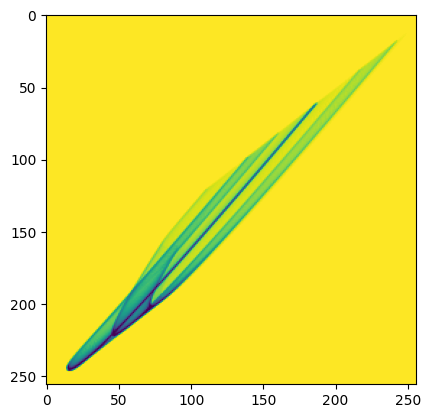

In [181]:
binned_array = bin_array(array, 3)
print(binned_array.shape)
plt.imshow(binned_array)

# Hadamard Transform

In [ ]:
TransformationMatrix = p.Hadamard(logDim)

In [ ]:
coefficentMatrix = np.array(data,dtype = float)
coefficentMatrix = np.dot(data,TransformationMatrix)

In [ ]:
print(coefficentMatrix)

[[-900.   -4.   -4. ...    4.    4.    4.]
 [-900.   -4.   -4. ...    4.    4.    4.]
 [-900.   -4.   -4. ...    4.    4.    4.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


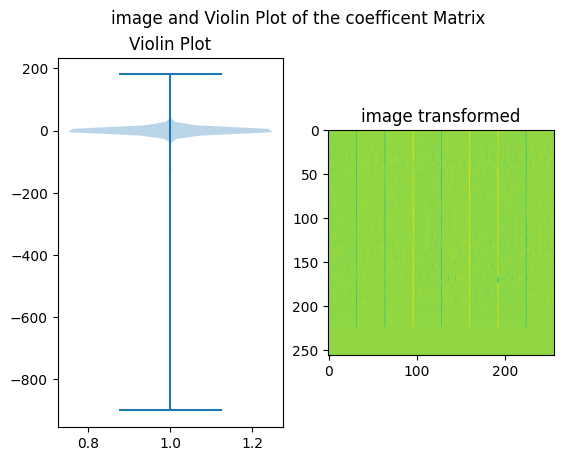

In [ ]:
# Create a subplot with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Create a scatter plot in the first subplot
ax1.violinplot(np.ravel(coefficentMatrix))
ax1.set_title('Violin Plot')

# Create a boxplot in the second subplot
ax2.imshow(coefficentMatrix)
ax2.set_title('image transformed')

# Add a title to the figure
plt.suptitle('image and Violin Plot of the coefficent Matrix')

# Show the plot
plt.show()


The violin plot shows that the majority of the coefficents value is near zero, therefore holds little information about the image and can be ignored

# Returning to normal

In [ ]:
BuiltBackImage = np.dot(coefficentMatrix,TransformationMatrix)

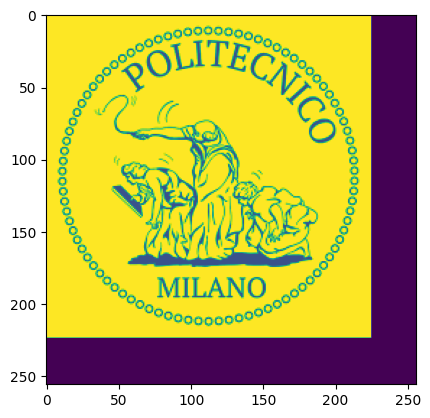

In [ ]:
plt.imshow(BuiltBackImage)

# Attempting a Compression

0.0
0.0
100


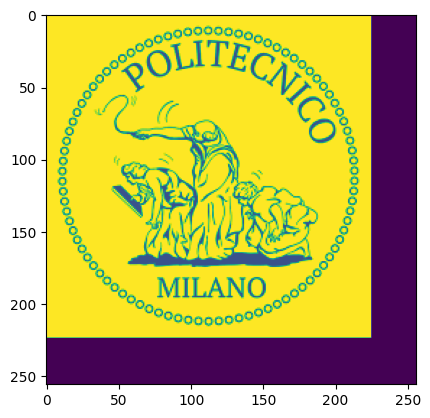

In [ ]:
absCoefficentMatrix = abs(coefficentMatrix)
compressed20 = np.array(coefficentMatrix)
perc =  0 #@param {type:"slider", min:0, max:100, step:1}
treshold = np.percentile(absCoefficentMatrix, perc)
print(treshold)
compressed20 [absCoefficentMatrix < treshold ] = 0
BuiltBackImage20 = np.dot(compressed20,TransformationMatrix)
plt.imshow(BuiltBackImage20)

MSE = p.MSE(BuiltBackImage20,BuiltBackImage)
PSNR = p.PSNR(BuiltBackImage20,BuiltBackImage)
print(MSE)
print(PSNR)

# REDUCING THE SAMPLES

In [ ]:
TransformationMatrix = p.Hadamard(logDim)
for _i in range(1,255):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:_i])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)
  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))


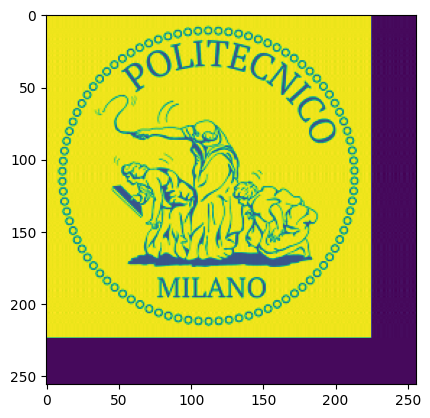

In [ ]:
TransformationMatrix = p.Hadamard(logDim)
reduction =  255 #@param {type:"slider", min:1, max:255, step:1}
ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
ReducedcoefficentMatrix = np.array(data,dtype = float)
ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)

BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
plt.imshow(BuiltBackImageReduced)




#scramble up

In [138]:
TransformationMatrix = p.Hadamard(logDim)

row_permutation = np.random.permutation(2**logDim)

# Rearrange the rows of the matrix using the permutation
scrambled_matrix = TransformationMatrix[row_permutation, :]



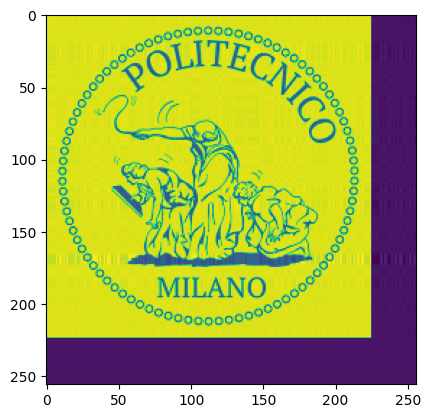

In [141]:
TransformationMatrix = scrambled_matrix
mseTrack_rand = np.zeros(256)
for reduction in range (0,256):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)

  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))/250
  mseTrack_rand[reduction]  = p.MSE(BuiltBackImageReduced,data)
plt.imshow(BuiltBackImageReduced)

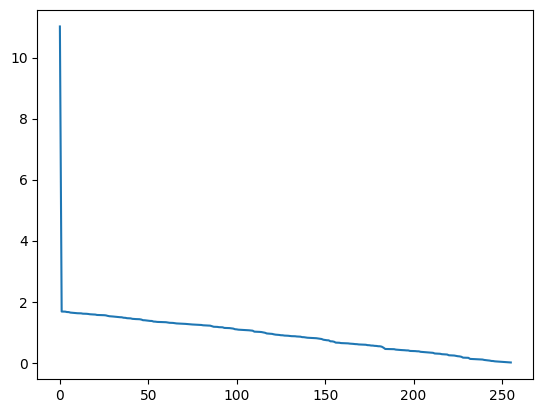

In [142]:
plt.plot(np.arange(0,2**logDim),mseTrack_rand)
plt.show()

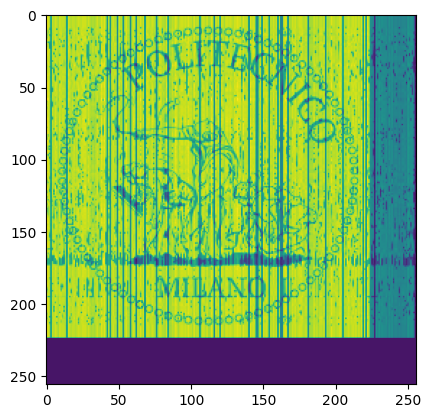

In [143]:
TransformationMatrix = scrambled_matrix
reduction =  131 #@param {type:"slider", min:1, max:255, step:1}
ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
ReducedcoefficentMatrix = np.array(data,dtype = float)
ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)

BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
plt.imshow(BuiltBackImageReduced)


# try and be smart

#make it a function

In [21]:
def smartTr (arr_input,immagine, transMat) :
  coefficents  = np.dot(immagine,transMat[:,arr_input[-4:]])

  result =  np.sum(np.dot(np.transpose(np.multiply(coefficents,hd[:,arr_input[-4:]])),a1_hd),axis = 0)
  result = np.abs(result)
  result[arr_input] = -1

  for _i in range (0,4):
    max_value = max(result)
    max_index = np.where(result == max_value) [0] [0]
    result[max_index] = -1
    arr_input = np.append(arr_input,max_index)

  return arr_input,coefficents

In [24]:
a1_im = matrix #data #stacked_matrix[:,:,6]   #np.random.randint(0, 10, (2**costant, 2**costant))
a1_hd =  p.Hadamard(logDim)
hd = p.Hadamard(logDim)

18.48835688167146
(4, 256)


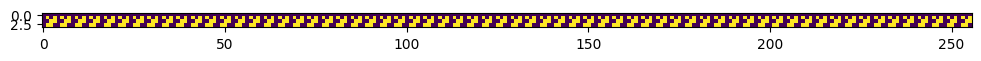

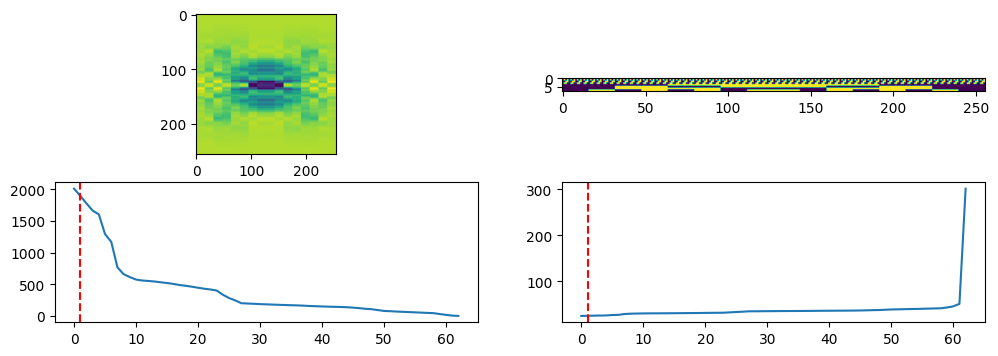

In [82]:
input = np.arange(0, 4)
coeff = np.array([1])
TransformationMatrix = p.Hadamard(logDim)
mseTrack_smart_single = np.zeros(64)
psnrTrack_smart_single = np.zeros(64)
par = 0
i = 0
fig1,ax1 =  plt.subplots(1, 1,figsize=(12, 12))
fig, axes = plt.subplots(2, 2,figsize=(12, 4))
while (len(input) <= 2**logDim):
  tempInput , tempCoeff = smartTr(input,a1_im,a1_hd)
  tempMatrix = TransformationMatrix[input, :]
  input = tempInput
  if len(coeff) == 1:
    coeff = tempCoeff
  else:
    coeff = np.concatenate((coeff,tempCoeff), axis = 1)
  BuiltBackIm = np.dot(coeff,(tempMatrix))/2**logDim
  par = 4 #@param {type:"slider", min:0, max:255, step:4}
  if i == int(par/4):
    axes[0,0].imshow(BuiltBackIm)
    axes[0,1].imshow(tempMatrix)
    ax1.imshow(TransformationMatrix[input[:4], :])
    print(p.MSE(BuiltBackImageReduced,a1_im))
    print(np.shape(TransformationMatrix[input[:4], :]))

  mseTrack_smart_single[i] = p.MSE(BuiltBackIm , a1_im)
  psnrTrack_smart_single[i] = p.PSNR (a1_im, BuiltBackIm)
  i+=1

axes[1,0].plot(mseTrack_smart_single[1:])
axes[1,0].axvline(x = int(par/4), color = 'r', linestyle = '--')

axes[1,1].plot(psnrTrack_smart_single[1:])
axes[1,1].axvline(x = int(par/4), color = 'r', linestyle = '--')



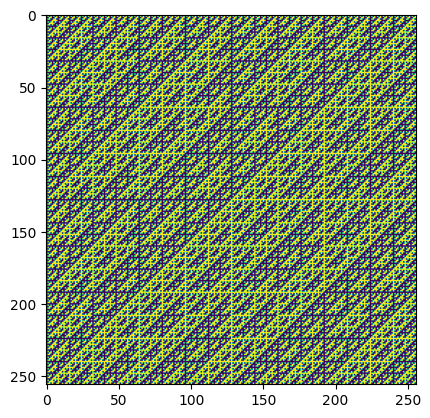

In [78]:
 plt.imshow(TransformationMatrix)

## compare with random

2837.224301046795
(256, 4)


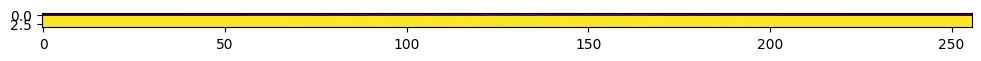

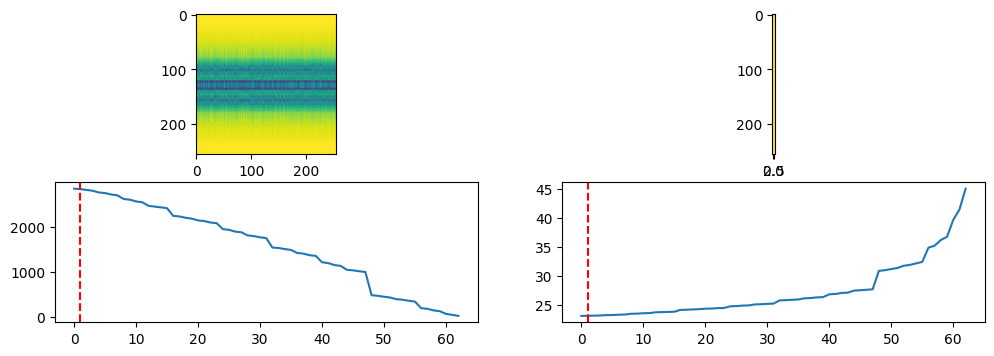

In [73]:
TransformationMatrix = p.Hadamard(logDim)
row_permutation = np.random.RandomState(seed=445).permutation(2**logDim)
TransformationMatrix = TransformationMatrix[row_permutation, :]
mseTrack_random_single = np.zeros(64)

psnrTrack_random_single = np.zeros(64)
par = 0
i = 0
fig1,ax1 =  plt.subplots(1, 1,figsize=(12, 12))
fig, axes = plt.subplots(2, 2,figsize=(12, 4))
for reduction in range (0,256,4):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
  ReducedcoefficentMatrix = np.array(a1_im,dtype = float)
  ReducedcoefficentMatrix = np.dot(a1_im,ReducedTransformationMatrix)

  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))/2**logDim
  par = 4 #@param {type:"slider", min:0, max:255, step:4}
  if reduction == par:
    axes[0,0].imshow(BuiltBackImageReduced)
    axes[0,1].imshow(ReducedcoefficentMatrix)
    ax1.imshow(np.transpose(ReducedcoefficentMatrix))
    print(p.MSE(BuiltBackImageReduced,a1_im))
    print(np.shape(ReducedcoefficentMatrix))

  mseTrack_random_single[i]  = p.MSE(BuiltBackImageReduced,a1_im)
  psnrTrack_random_single[i]  = p.PSNR(a1_im,BuiltBackImageReduced)
  i = i +1


axes[1,0].plot(mseTrack_ordered_single[1:])
axes[1,0].axvline(x = int(par/4), color = 'r', linestyle = '--')

axes[1,1].plot(psnrTrack_ordered_single[1:])
axes[1,1].axvline(x = int(par/4), color = 'r', linestyle = '--')



## compare with ordered

2853.3866974777648
(256, 4)


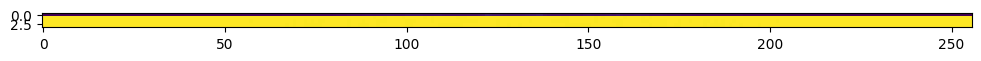

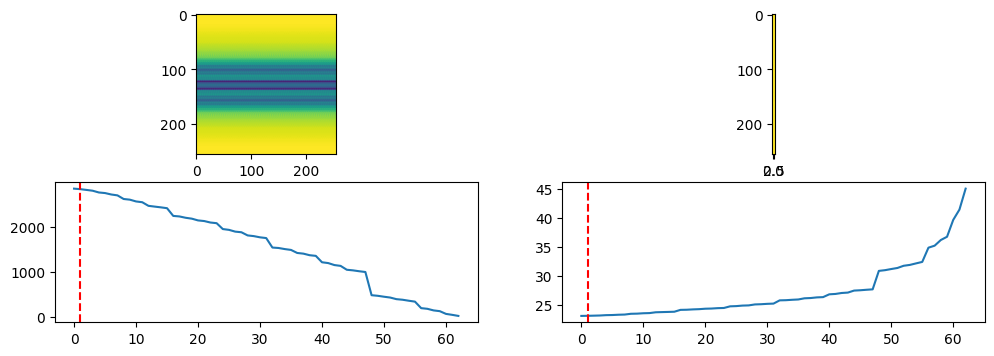

In [74]:
TransformationMatrix = p.Hadamard(logDim)
mseTrack_ordered_single = np.zeros(64)
psnrTrack_ordered_single = np.zeros(64)
par = 0
i = 0
fig1,ax1 =  plt.subplots(1, 1,figsize=(12, 12))
fig, axes = plt.subplots(2, 2,figsize=(12, 4))
for reduction in range (0,256,4):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
  ReducedcoefficentMatrix = np.array(a1_im,dtype = float)
  ReducedcoefficentMatrix = np.dot(a1_im,ReducedTransformationMatrix)

  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))/2**logDim
  par = 4 #@param {type:"slider", min:0, max:255, step:4}
  if reduction == par:
    axes[0,0].imshow(BuiltBackImageReduced)
    axes[0,1].imshow(ReducedcoefficentMatrix)
    ax1.imshow(np.transpose(ReducedcoefficentMatrix))
    print(p.MSE(BuiltBackImageReduced,a1_im))
    print(np.shape(ReducedcoefficentMatrix))
  mseTrack_ordered_single[i]  = p.MSE(BuiltBackImageReduced,a1_im)

  psnrTrack_ordered_single[i]  = p.PSNR(a1_im,BuiltBackImageReduced)
  i = i +1

axes[1,0].plot(mseTrack_ordered_single[1:])
axes[1,0].axvline(x = int(par/4), color = 'r', linestyle = '--')

axes[1,1].plot(psnrTrack_ordered_single[1:])
axes[1,1].axvline(x = int(par/4), color = 'r', linestyle = '--')



# ultimate comparation

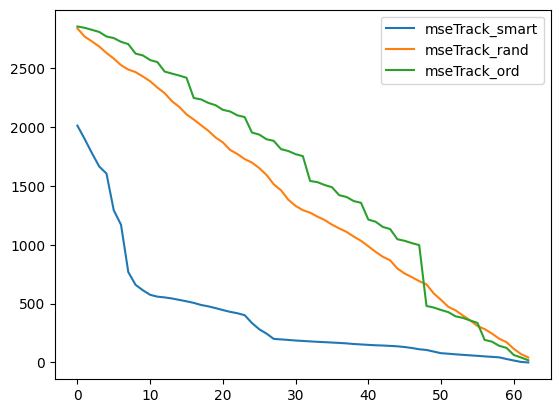

In [71]:
plt.plot(
    mseTrack_smart_single[1:], label = "mseTrack_smart")
plt.plot(
    mseTrack_random_single[1:], label = "mseTrack_rand")
plt.plot(
    mseTrack_ordered_single[1:], label = "mseTrack_ord")

plt.legend()
plt.show()

# catturati

# STATISICAL PERFORMANCE COMPARATION

In [83]:
costant = 8
SampleImages = np.random.randint(0, 10, (100,2**costant, 2**costant))
a1_hd =  p.Hadamard(costant)
hd = p.Hadamard(costant)

TransformationMatrix = p.Hadamard(logDim)
row_permutation = np.random.RandomState(seed=42).permutation(2**logDim)

## orderd

In [ ]:
TransformationMatrix = p.Hadamard(8)
mseTrack_ord = np.zeros((100,64),dtype = float)
psnrTrack_ord = np.zeros((100,64),dtype = float)

for i in range(0,100):
  j = 0
  for reduction in range (0,256,4):
    ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
    ReducedcoefficentMatrix = np.array(SampleImages[i],dtype = float)
    ReducedcoefficentMatrix = np.dot(SampleImages[i],ReducedTransformationMatrix)

    BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))/250
    mseTrack_ord[i,j]  = p.MSE(BuiltBackImageReduced,SampleImages[i])
    psnrTrack_ord[i,j]  = p.PSNR(BuiltBackImageReduced,SampleImages[i])
    j+=1

## Scrambled


In [ ]:
TransformationMatrix = scrambled_matrix
mseTrack_rand = np.zeros((100,64),dtype = float)
psnrTrack_rand = np.zeros((100,64),dtype = float)

for i in range(0,100):
  row_permutation = np.random.RandomState(seed=i).permutation(2**logDim)
  scrambled_matrix = TransformationMatrix[row_permutation, :]
  j = 0
  for reduction in range (0,256,4):
    ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:reduction])
    ReducedcoefficentMatrix = np.array(SampleImages[i],dtype = float)
    ReducedcoefficentMatrix = np.dot(SampleImages[i],ReducedTransformationMatrix)

    BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))/250
    mseTrack_rand[i,j]  = p.MSE(BuiltBackImageReduced,SampleImages[i])
    psnrTrack_rand[i,j]  = p.PSNR(BuiltBackImageReduced,SampleImages[i])
    j+=1


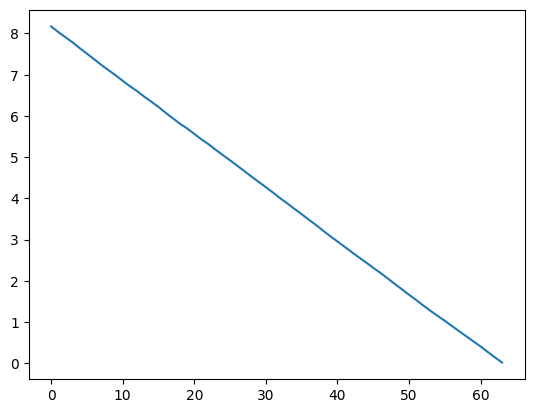

In [ ]:
plt.plot(mseTrack_smart[4,:])

## smart

In [ ]:
mseTrack_smart = np.zeros((100,64),dtype = float)
psnrTrack_smart = np.zeros((100,64),dtype = float)

for j in range(0,100):
  input = np.arange(0, 4)
  coeff = np.array([1])
  TransformationMatrix = p.Hadamard(costant)
  i = 0
  while (len(input) <= 2**logDim):
    tempInput , tempCoeff = smartTr(input,SampleImages[j],TransformationMatrix)
    tempMatrix = TransformationMatrix[input, :]
    input = tempInput
    if len(coeff) == 1:
      coeff = tempCoeff
    else:
      coeff = np.concatenate((coeff,tempCoeff), axis = 1)
    BuiltBackIm = np.dot(coeff,(tempMatrix))/250
    mseTrack_smart[j,i] = p.MSE(BuiltBackIm , SampleImages[j])
    psnrTrack_smart[j,i] = p.PSNR(BuiltBackIm , SampleImages[j])
    i+=1